In [1]:
import numpy as np
import tensorflow as tf
wordsList = np.load('./imdb/wordsList.npy')
print('Loaded the word list!')
wordsList = wordsList.tolist() #Originally loaded as numpy array
wordsList = [word.decode('UTF-8') for word in wordsList] #Encode words as UTF-8
wordVectors = np.load('./imdb/wordVectors.npy')
print ('Loaded the word vectors!')


Loaded the word list!
Loaded the word vectors!


In [2]:
print(len(wordsList))
print(wordVectors.shape)

400000
(400000, 50)


In [3]:
baseballIndex = wordsList.index('baseball')
wordVectors[baseballIndex]

array([-1.93270004,  1.04209995, -0.78514999,  0.91033   ,  0.22711   ,
       -0.62158   , -1.64929998,  0.07686   , -0.58679998,  0.058831  ,
        0.35628   ,  0.68915999, -0.50598001,  0.70472997,  1.26639998,
       -0.40031001, -0.020687  ,  0.80862999, -0.90565997, -0.074054  ,
       -0.87674999, -0.62910002, -0.12684999,  0.11524   , -0.55685002,
       -1.68260002, -0.26291001,  0.22632   ,  0.713     , -1.08280003,
        2.12310004,  0.49869001,  0.066711  , -0.48225999, -0.17896999,
        0.47699001,  0.16384   ,  0.16537   , -0.11506   , -0.15962   ,
       -0.94926   , -0.42833   , -0.59456998,  1.35660005, -0.27506   ,
        0.19918001, -0.36008   ,  0.55667001, -0.70314997,  0.17157   ], dtype=float32)

In [4]:
import tensorflow as tf
maxSeqLength = 10 #Maximum length of sentence
numDimensions = 300 #Dimensions for each word vector
firstSentence = np.zeros((maxSeqLength), dtype='int32')
firstSentence[0] = wordsList.index("i")
firstSentence[1] = wordsList.index("thought")
firstSentence[2] = wordsList.index("the")
firstSentence[3] = wordsList.index("movie")
firstSentence[4] = wordsList.index("was")
firstSentence[5] = wordsList.index("incredible")
firstSentence[6] = wordsList.index("and")
firstSentence[7] = wordsList.index("inspiring")
#firstSentence[8] and firstSentence[9] are going to be 0
print(firstSentence.shape)
print(firstSentence) #Shows the row index for each word

(10,)
[    41    804 201534   1005     15   7446      5  13767      0      0]


In [5]:
with tf.Session() as sess:
    print(tf.nn.embedding_lookup(wordVectors,firstSentence).eval().shape)

(10, 50)


In [6]:
from os import listdir
from os.path import isfile, join
positiveFiles = ['./imdb/positiveReviews/' + f for f in listdir('./imdb/positiveReviews/') if isfile(join('./imdb/positiveReviews/', f))]
negativeFiles = ['./imdb/negativeReviews/' + f for f in listdir('./imdb/negativeReviews/') if isfile(join('./imdb/negativeReviews/', f))]
numWords = []
for pf in positiveFiles:
    with open(pf, "r", encoding='utf-8') as f:
        line=f.readline()
        counter = len(line.split())
        numWords.append(counter)       
print('Positive files finished')

for nf in negativeFiles:
    with open(nf, "r", encoding='utf-8') as f:
        line=f.readline()
        counter = len(line.split())
        numWords.append(counter)  
print('Negative files finished')

numFiles = len(numWords)
print('The total number of files is', numFiles)
print('The total number of words in the files is', sum(numWords))
print('The average number of words in the files is', sum(numWords)/len(numWords))

Positive files finished
Negative files finished
The total number of files is 25000
The total number of words in the files is 5844680
The average number of words in the files is 233.7872


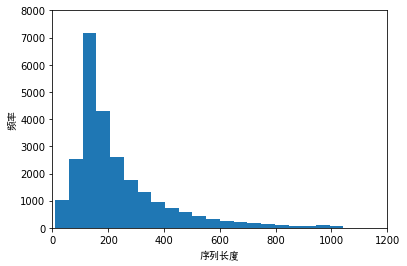

In [7]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
myfont = fm.FontProperties(fname='/home/wumg/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/simhei.ttf')

%matplotlib inline
plt.hist(numWords, 50)
plt.xlabel('序列长度',fontproperties=myfont)
plt.ylabel('频率',fontproperties=myfont)
plt.axis([0, 1200, 0, 8000])
plt.show()

In [8]:
maxSeqLength = 250
fname = positiveFiles[3] #Can use any valid index (not just 3)
with open(fname) as f:
    for lines in f:
        print(lines)
        exit

I agree with the other comments. I saw this movie years ago. Christopher Plummer is hilarious as a dandy. The ribaldry is unsurpassed. If this comes out on video, I will definitely buy it.


In [9]:
# 删除标点符号、括号、问号等，只留下字母数字字符
import re
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

def cleanSentences(string):
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())

firstFile = np.zeros((maxSeqLength), dtype='int32')
with open(fname) as f:
    indexCounter = 0
    line=f.readline()
    cleanedLine = cleanSentences(line)
    split = cleanedLine.split()
    for word in split:
        try:
            firstFile[indexCounter] = wordsList.index(word)
        except ValueError:
            firstFile[indexCounter] = 399999 #Vector for unknown words
        indexCounter = indexCounter + 1
firstFile

array([    41,   2137,     17, 201534,     68,   1939,     41,    822,
           37,   1005,     82,    363,   3257,  19472,     14,  20720,
           19,      7,  30846, 201534, 270078,     14,  60549,     83,
           37,    934,     66,     13,    974,     41,     43,   3936,
          987,     20,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [10]:
ids = np.load('./imdb/idsMatrix.npy')

In [11]:
from random import randint

def getTrainBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        if (i % 2 == 0): 
            num = randint(1,11499)
            labels.append([1,0])
        else:
            num = randint(13499,24999)
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        num = randint(11499,13499)
        if (num <= 12499):
            labels.append([1,0])
        else:
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

In [12]:
batchSize = 24
lstmUnits = 64
numClasses = 2
iterations = 20000

In [13]:
import tensorflow as tf
tf.reset_default_graph()

labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, maxSeqLength])

In [15]:
data = tf.nn.embedding_lookup(wordVectors,input_data)


In [16]:
lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.25)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

In [17]:
weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

In [18]:
correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

In [19]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)

In [20]:
import datetime

tf.summary.scalar('Loss', loss)
tf.summary.scalar('Accuracy', accuracy)
merged = tf.summary.merge_all()
logdir = "tensorboard/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
writer = tf.summary.FileWriter(logdir, sess.graph)

In [21]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())
with tf.device('/gpu:0'):
    for i in range(iterations):
       #Next Batch of reviews
       nextBatch, nextBatchLabels = getTrainBatch();
       sess.run(optimizer, {input_data: nextBatch, labels: nextBatchLabels})
 
       #Write summary to Tensorboard
       if (i % 50 == 0):
           summary = sess.run(merged, {input_data: nextBatch, labels: nextBatchLabels})
           writer.add_summary(summary, i)

       #Save the network every 1000 training iterations
       if (i % 1000 == 0 and i != 0):
           save_path = saver.save(sess, "models/pretrained_lstm.ckpt", global_step=i)
           print("saved to %s" % save_path)
    writer.close()

saved to models/pretrained_lstm.ckpt-1000
saved to models/pretrained_lstm.ckpt-2000
saved to models/pretrained_lstm.ckpt-3000
saved to models/pretrained_lstm.ckpt-4000
saved to models/pretrained_lstm.ckpt-5000
saved to models/pretrained_lstm.ckpt-6000
saved to models/pretrained_lstm.ckpt-7000
saved to models/pretrained_lstm.ckpt-8000
saved to models/pretrained_lstm.ckpt-9000
saved to models/pretrained_lstm.ckpt-10000
saved to models/pretrained_lstm.ckpt-11000
saved to models/pretrained_lstm.ckpt-12000
saved to models/pretrained_lstm.ckpt-13000
saved to models/pretrained_lstm.ckpt-14000
saved to models/pretrained_lstm.ckpt-15000
saved to models/pretrained_lstm.ckpt-16000
saved to models/pretrained_lstm.ckpt-17000
saved to models/pretrained_lstm.ckpt-18000
saved to models/pretrained_lstm.ckpt-19000


In [22]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('./models'))


INFO:tensorflow:Restoring parameters from ./models/pretrained_lstm.ckpt-19000


In [24]:
iterations = 10
for i in range(iterations):
    nextBatch, nextBatchLabels = getTestBatch();
    print("Accuracy for this batch:", (sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels})) * 100)


Accuracy for this batch: 75.0
Accuracy for this batch: 83.3333313465
Accuracy for this batch: 83.3333313465
Accuracy for this batch: 87.5
Accuracy for this batch: 83.3333313465
Accuracy for this batch: 75.0
Accuracy for this batch: 79.1666686535
Accuracy for this batch: 91.6666686535
Accuracy for this batch: 75.0
Accuracy for this batch: 83.3333313465
